In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('./data/data.xlsx', index_col=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2023-04-24 00시,236,251,253,254,265,279,261,279,140,183
1,2023-04-24 01시,211,190,164,192,184,241,208,243,126,138
2,2023-04-24 02시,145,161,115,200,152,184,151,173,83,94
3,2023-04-24 03시,162,170,105,185,119,152,196,141,59,86
4,2023-04-24 04시,200,299,151,47,181,289,362,207,135,169


In [3]:
input_volumes = pd.read_excel('./data/input_volume.xlsx', index_col=0)
input_volumes

,0_0,0_2,1_3,2_2,3_2,3_1,4_1,4_2
0,295,491,158,254,208,232,300,252
1,216,437,103,226,189,141,185,220
2,195,314,93,197,147,128,187,147
3,205,352,68,256,204,119,258,143
4,482,520,161,438,313,335,747,205
...,...,...,...,...,...,...,...,...
115,1435,2103,738,1313,1133,1080,1249,1479
116,1129,1850,673,1168,897,857,1096,1256
117,989,1627,527,1051,750,830,893,1033
118,875,1407,438,843,628,628,775,818


In [4]:
train_eT = np.array(data.iloc[56,1:].values)
train_eT

array([1005, 1553, 1180, 1682, 1911, 1424, 1628, 1494, 1084, 1454],
      dtype=object)

In [5]:
train_input = input_volumes.iloc[56,:].values
train_input

array([1549, 2560, 1157, 2065, 1801, 1514, 1842, 1211], dtype=int64)

In [6]:
from BRL import p_matrix, I_matrix
from optimizer3 import solve

In [7]:
from hyperopt import hp, fmin, tpe, Trials
def objective(args):
    w2, w3, w5, w6, w8, w9 = args
    solution = solve(e_T=train_eT, w2=int(w2), w3=int(w3), w5=int(w5), w6=int(w6), w8=int(w8), w9=int(w9), lambda2=10, input_volume=train_input, max_time=5)
    if bool(solution): # 해가 존재
        x = np.zeros(66)
        for i in solution:
            x[i] = solution[i]
        e = p_matrix @ x
        diff = np.linalg.norm(train_eT - e)
        return diff
    else: # 해가 존재하지 않음
        return np.Inf

space = [
    hp.quniform('w2', 1, 999, 1),
    hp.quniform('w3', 1, 999, 1),
    hp.quniform('w5', 1, 999, 1),
    hp.quniform('w6', 1, 999, 1),
    hp.quniform('w8', 1, 999, 1),
    hp.quniform('w9', 1, 999, 1),
]

results = []
for i in range(50):
    try:
        trials = Trials()
        result = fmin(
            fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10
        )
        
        results.append(result)
    except Exception as e:
        print(f"Iteration {i}: 에러가 발생했습니다. 다음 반복으로 이동합니다. 오류 내용: {e}")

100%|██████████| 10/10 [00:51<00:00,  5.17s/trial, best loss: 792.5484212336809]


In [14]:
results

[{'w2': 757.0,
  'w3': 395.0,
  'w5': 186.0,
  'w6': 994.0,
  'w8': 676.0,
  'w9': 650.0},
 {'w2': 504.0,
  'w3': 940.0,
  'w5': 406.0,
  'w6': 229.0,
  'w8': 100.0,
  'w9': 355.0},
 {'w2': 837.0,
  'w3': 459.0,
  'w5': 511.0,
  'w6': 545.0,
  'w8': 781.0,
  'w9': 466.0},
 {'w2': 293.0,
  'w3': 614.0,
  'w5': 675.0,
  'w6': 414.0,
  'w8': 844.0,
  'w9': 720.0},
 {'w2': 853.0,
  'w3': 829.0,
  'w5': 840.0,
  'w6': 338.0,
  'w8': 488.0,
  'w9': 642.0},
 {'w2': 921.0, 'w3': 482.0, 'w5': 282.0, 'w6': 64.0, 'w8': 388.0, 'w9': 20.0},
 {'w2': 894.0, 'w3': 264.0, 'w5': 678.0, 'w6': 720.0, 'w8': 205.0, 'w9': 68.0},
 {'w2': 756.0,
  'w3': 865.0,
  'w5': 542.0,
  'w6': 367.0,
  'w8': 207.0,
  'w9': 343.0},
 {'w2': 765.0,
  'w3': 309.0,
  'w5': 967.0,
  'w6': 123.0,
  'w8': 302.0,
  'w9': 994.0},
 {'w2': 997.0,
  'w3': 715.0,
  'w5': 626.0,
  'w6': 471.0,
  'w8': 709.0,
  'w9': 828.0},
 {'w2': 197.0, 'w3': 327.0, 'w5': 728.0, 'w6': 3.0, 'w8': 362.0, 'w9': 238.0},
 {'w2': 359.0, 'w3': 150.0, 'w5': 

In [21]:
errors = []
for result in results:
    solution = solve(e_T=train_eT, w2=int(result['w2']), w3=int(result['w3']), w5=int(result['w5']),\
        w6=int(result['w6']), w8=int(result['w8']), w9=int(result['w9']), lambda2=10, max_time=5)
    x = np.zeros(66)
    for i in solution:
        x[i] = solution[i]
    e = p_matrix @ x
    errors.append(np.linalg.norm(train_eT - e))

In [22]:
errors

[844.8857910984183,
 894.5825842257382,
 799.4354257849724,
 807.3865245345627,
 809.8191156054542,
 802.2748905456284,
 827.0804072156467,
 832.1670505373305,
 798.0332073291186,
 789.2616803063481,
 801.6663894663416,
 822.0954932366434,
 799.7136987697535,
 807.0136306159891,
 794.4085850492805,
 793.6964155141435,
 826.7170011557764,
 805.1794830967814,
 839.3169842199072,
 805.0316763954074,
 819.2636938129261,
 802.5640161382767,
 801.7880019057407,
 814.2192579397763,
 891.7600574145491,
 809.092083758085,
 809.7833043475273,
 822.2219894894565,
 771.527057205384,
 792.2108305242992,
 759.1488655066278,
 795.7260835237212,
 812.5589209405064,
 789.5796349957362,
 799.5023452123202,
 738.1720666619674,
 802.2723976306302,
 797.3919989565985,
 806.047145023168,
 815.4452771339104,
 848.8286046075498,
 791.7543811056557,
 806.658539903967,
 803.8426462934148,
 801.9364064562726,
 806.3839036091929,
 810.364115691212,
 893.4438986304624,
 776.0637860382354,
 772.457765835777]

In [19]:
import pickle
with open('errors.pickle', 'wb') as f:
    pickle.dump(errors, f)

In [24]:
outliers = [i for i in errors if i > 160]
for outlier in outliers:
    print(f"Error : {outlier}, Parameter : {results[errors.index(outlier)]}")

Error : 187.74450724322136, Parameter : {'lambda2': 0, 'w2': 650.0, 'w3': 727.0, 'w5': 852.0, 'w6': 810.0, 'w8': 703.0, 'w9': 568.0}
Error : 197.06344156134085, Parameter : {'lambda2': 0, 'w2': 218.0, 'w3': 812.0, 'w5': 399.0, 'w6': 929.0, 'w8': 507.0, 'w9': 692.0}
Error : 171.37969541342989, Parameter : {'lambda2': 0, 'w2': 463.0, 'w3': 930.0, 'w5': 868.0, 'w6': 144.0, 'w8': 646.0, 'w9': 571.0}
Error : 182.2333668678708, Parameter : {'lambda2': 0, 'w2': 319.0, 'w3': 754.0, 'w5': 664.0, 'w6': 863.0, 'w8': 927.0, 'w9': 632.0}
Error : 171.9447585708852, Parameter : {'lambda2': 0, 'w2': 328.0, 'w3': 895.0, 'w5': 491.0, 'w6': 261.0, 'w8': 58.0, 'w9': 399.0}


In [23]:
errors.index(min(errors))

35

In [24]:
print(errors[errors.index(min(errors))], results[errors.index(min(errors))])

738.1720666619674 {'w2': 631.0, 'w3': 100.0, 'w5': 587.0, 'w6': 349.0, 'w8': 649.0, 'w9': 34.0}


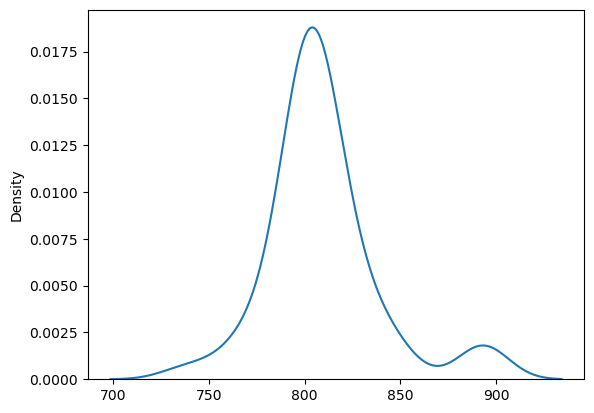

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(errors)
plt.show()

In [ ]:
solution = solve(e_T=train_eT, w2=824, w3=159, w5=362, w6=95, w8=364, w9=63, lambda2=1)
x = np.zeros(66)
for i in solution:
    x[i] = solution[i]
e = p_matrix@x
print(e)
print(train_eT)
print(np.linalg.norm(train_eT-e))

[1745. 1677. 1657. 1582. 1657. 1583. 1715. 1520. 1228. 1252.]
[1005 1553 1180 1682 1911 1424 1628 1494 1084 1454]
979.8402931090352


In [ ]:
I_matrix@x

array([   0., 1745., 1167.,    0., 1796., 1501., 1582., 1166.])